# Basic Data Analysis _ week 1 

In [15]:
# 판다스,넘파이,그래프 시각화도구 사용
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use('seaborn')
sns.set(font_scale=2.5)

# mano lib - null data 확인
import missingno as msno
#isna 처럼 결측 데이터를 처리해주는 모듈

#ignore warnings 경고메세지 무시 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
#notebook을 실행한 브라우저에서 그림을 바로 알아볼수있도록

## 1. 데이터 확인

In [3]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


속성은 다음과 같은 의미를 가집니다:

- Survived: 타깃입니다. 0은 생존하지 못한 것이고 1은 생존을 의미합니다.
- Pclass: 승객 등급. 1, 2, 3등석.
- Name, Sex, Age: 이름 그대로 의미입니다.
- SibSp: 함께 탑승한 형제, 배우자의 수.
- Parch: 함께 탑승한 자녀, 부모의 수.
- Ticket: 티켓 아이디
- Fare: 티켓 요금 (파운드)
- Cabin: 객실 번호
- Embarked: 승객이 탑승한 곳. C(Cherbourg), Q(Queenstown),S(Southampton)

예측하려는 데이터 즉, 타겟 레이블은 Survived  
feature = Pclass, Age, SibSp, Parch, Fare

In [6]:
df_train.info() #데이터의 집합과 각 열들의 자료형을 자세히 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PassenserID 숫자와 다른, 그러니까 null data가 존재하는 열(feature)가 있는 것 확인

-Age, Cabin, Embarked 에서 NaN값 확인

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


판다스의 describe() 메소드는 각 feature가 가진 통계치(N,mean,std,min,max,사분위수) 를 반환해준다.  
전체 카운트 891, 418에 못 미치는 특성들이 존재한다.   
이 값을 null data라고 한다.  
  
시각화를 통해서 결측치의 분포를 확인한다.

In [9]:
for c in df_train.columns: #index 순서대로 
    print(f"column :{c} →, NaN Value : {(100*(df_train[c].isnull().sum()/df_train[c].shape[0])).round(2)} %")


column :PassengerId →, NaN Value : 0.0 %
column :Survived →, NaN Value : 0.0 %
column :Pclass →, NaN Value : 0.0 %
column :Name →, NaN Value : 0.0 %
column :Sex →, NaN Value : 0.0 %
column :Age →, NaN Value : 19.87 %
column :SibSp →, NaN Value : 0.0 %
column :Parch →, NaN Value : 0.0 %
column :Ticket →, NaN Value : 0.0 %
column :Fare →, NaN Value : 0.0 %
column :Cabin →, NaN Value : 77.1 %
column :Embarked →, NaN Value : 0.22 %


In [11]:
for c in df_test.columns:
    print(f"column :{c} →, NaN Value : {(100*(df_test[c].isnull().sum()/df_test[c].shape[0])).round(2)} %")


column :PassengerId →, NaN Value : 0.0 %
column :Pclass →, NaN Value : 0.0 %
column :Name →, NaN Value : 0.0 %
column :Sex →, NaN Value : 0.0 %
column :Age →, NaN Value : 20.57 %
column :SibSp →, NaN Value : 0.0 %
column :Parch →, NaN Value : 0.0 %
column :Ticket →, NaN Value : 0.0 %
column :Fare →, NaN Value : 0.24 %
column :Cabin →, NaN Value : 78.23 %
column :Embarked →, NaN Value : 0.0 %


얼마나 결측치가 있는지 확인해보자

In [23]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Train, Test set 에서 Age(둘다 약 20%), Cabin(둘다 약 80%), Embarked(Train만 0.22%) null data 존재하는 것을 볼 수 있다

MANO 라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 관찰  
-missingno 모듈로 결측치를 시각화

1.msno.matrix  

행렬로 표시하면서 누락 데이터를 흰색으로 나타낸다

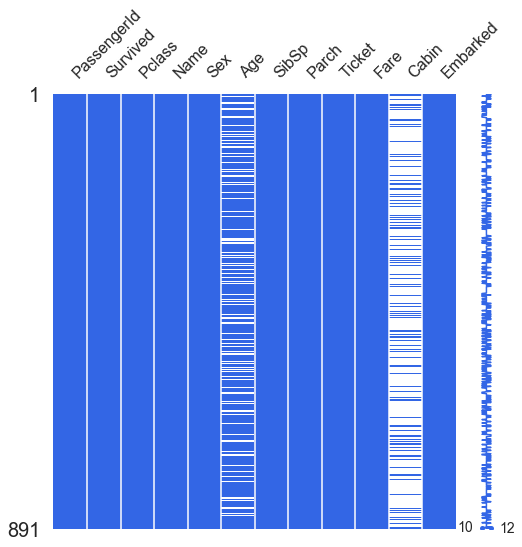

In [29]:
msno.matrix(df_train.iloc[:, :], figsize=(8, 8), color=(0.2, 0.4, 0.9))

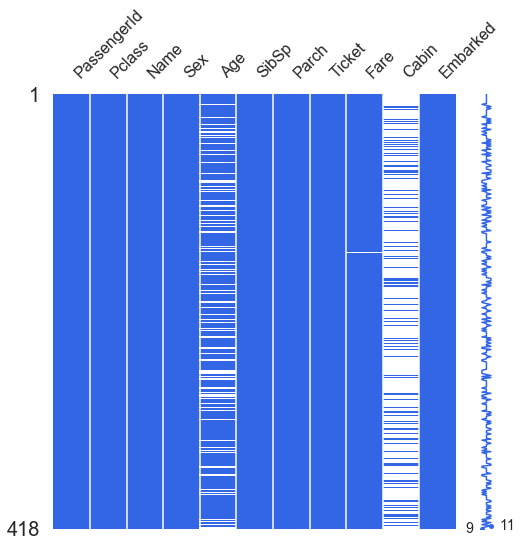

In [28]:
msno.matrix(df_test.iloc[:, :], figsize=(8, 8), color=(0.2, 0.4, 0.9))

2. msno.bar  
바 차트로 표현

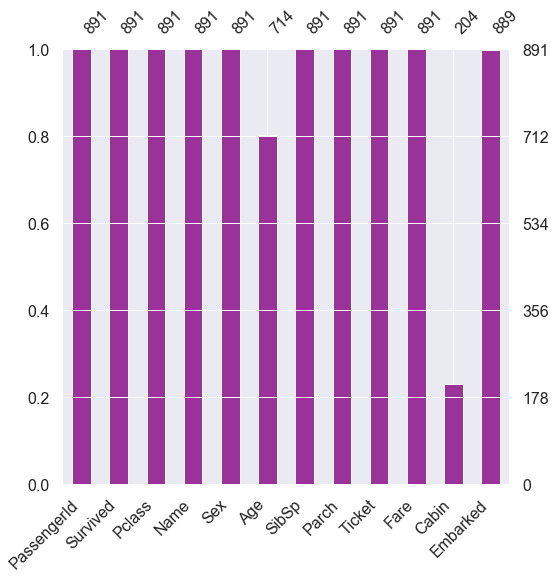

In [32]:
msno.bar(df_train.iloc[:, :], figsize=(8, 8), color=(0.6, 0.2, 0.6))

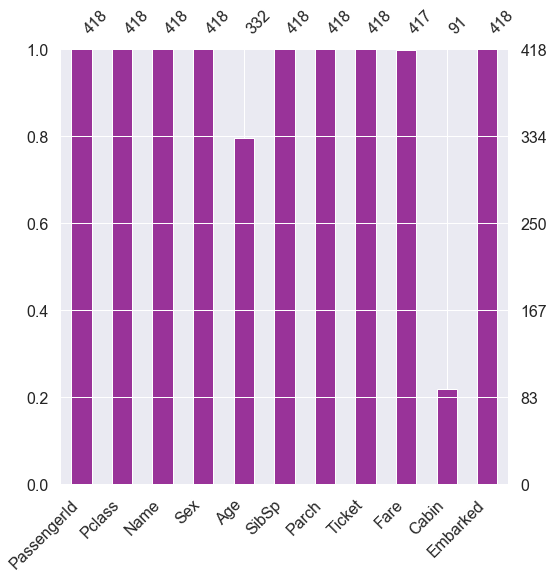

In [33]:
msno.bar(df_test.iloc[:, :], figsize=(8, 8), color=(0.6, 0.2, 0.6))

3. msno.heatmap  
결측치가 하나도 없거나 아예 비어 있는 변수들은 의미있는 상관관계를 나타내기 힘들기 때문에 자동으로 제거된다.
  
 변수들 사이의 ## 상관 관계 ##를 파악해서 특정 변수를 선택하는 데 효과적이긴 하다.
  
 하지만 더 큰 관계를 나타내기 위한 목적으로는 설명력이 부족하다. 
  
 또한, 방대한 데이터셋을 지원하지 않는다.

(<matplotlib.axes._subplots.AxesSubplot at 0x1305e600048>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1305f68b0c8>)

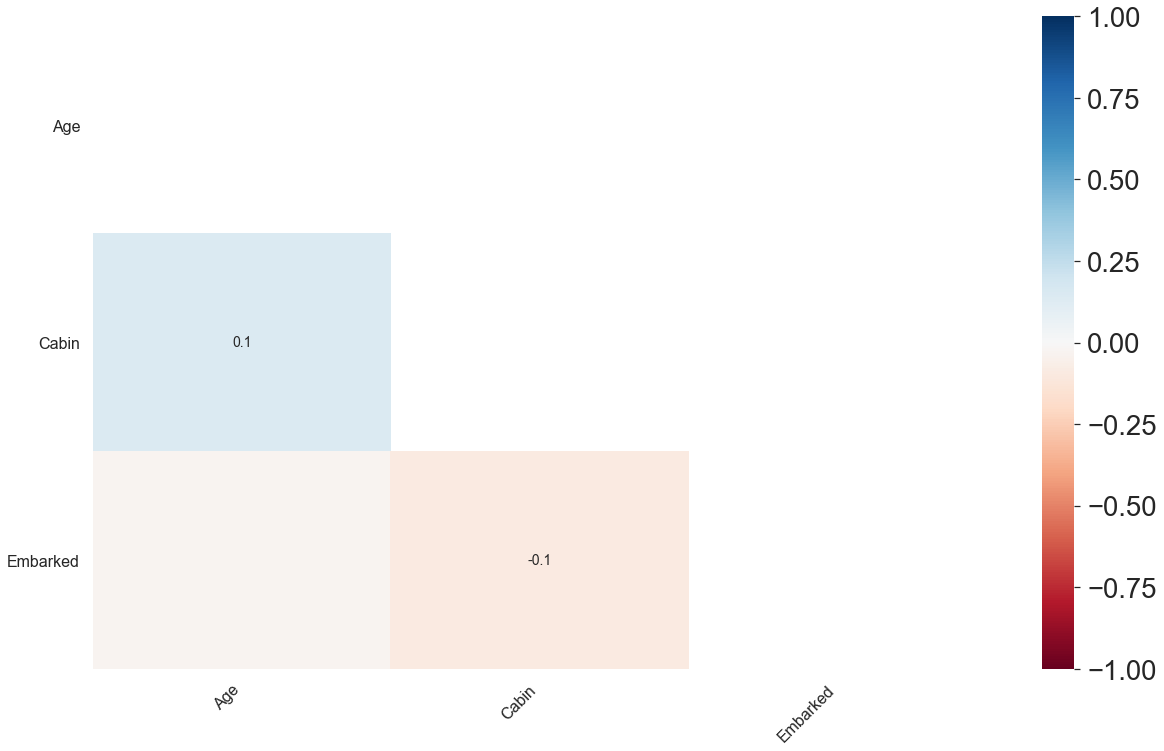

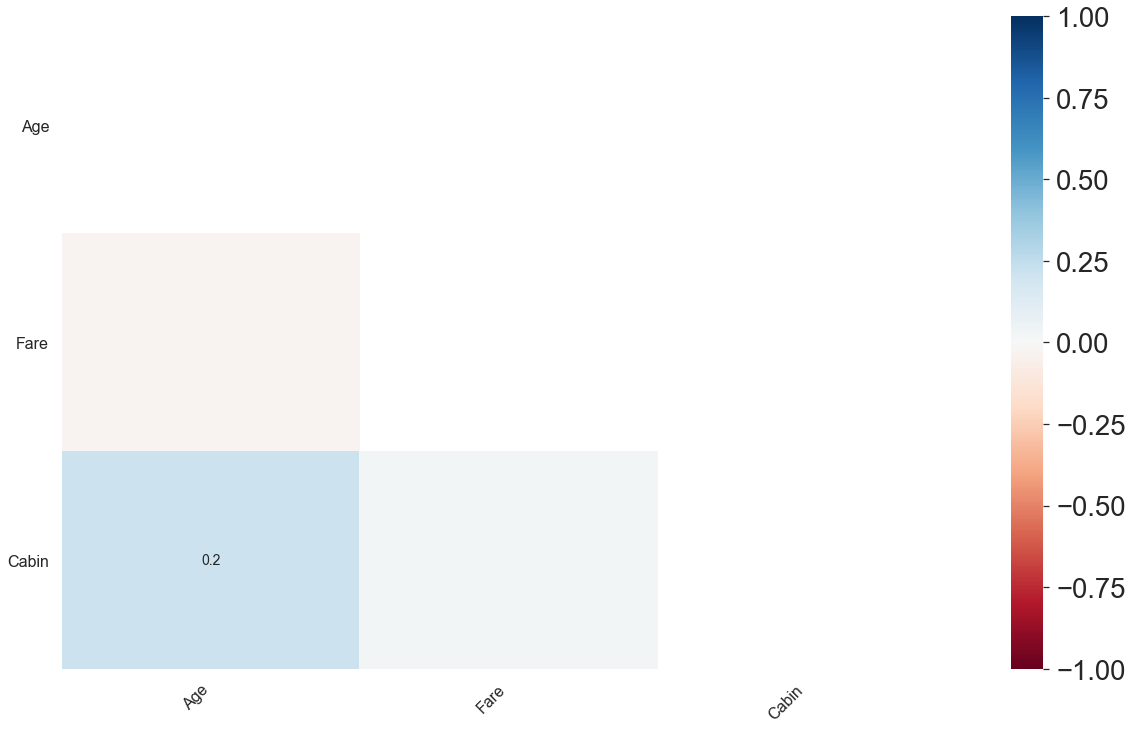

In [41]:
msno.heatmap(df_train), msno.heatmap(df_test)

4. msno.dendrogram  
계층적 클러스터링 알고리즘을 활용한 누락 데이터 시각화 방법이다.  
 0에 가까울 수록 누락 데이터가 많은 변수이다



(<matplotlib.axes._subplots.AxesSubplot at 0x1305fc06e08>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1305f141548>)

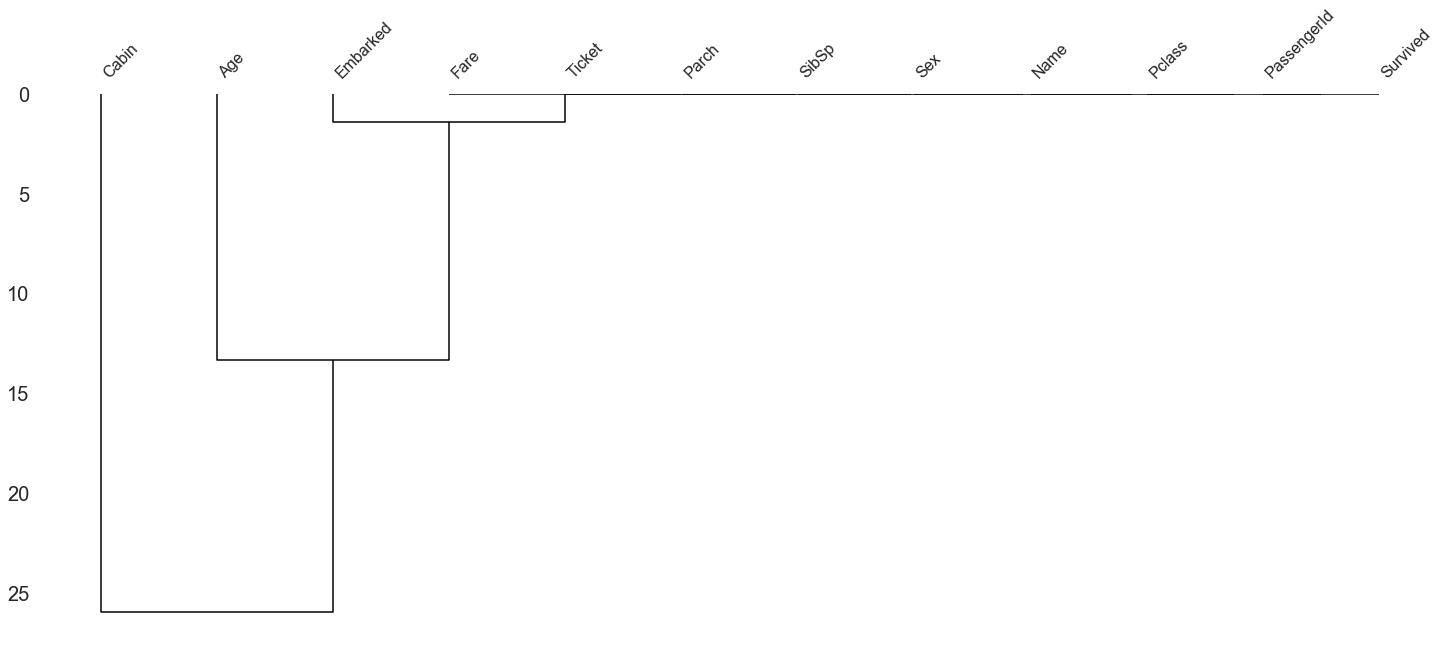

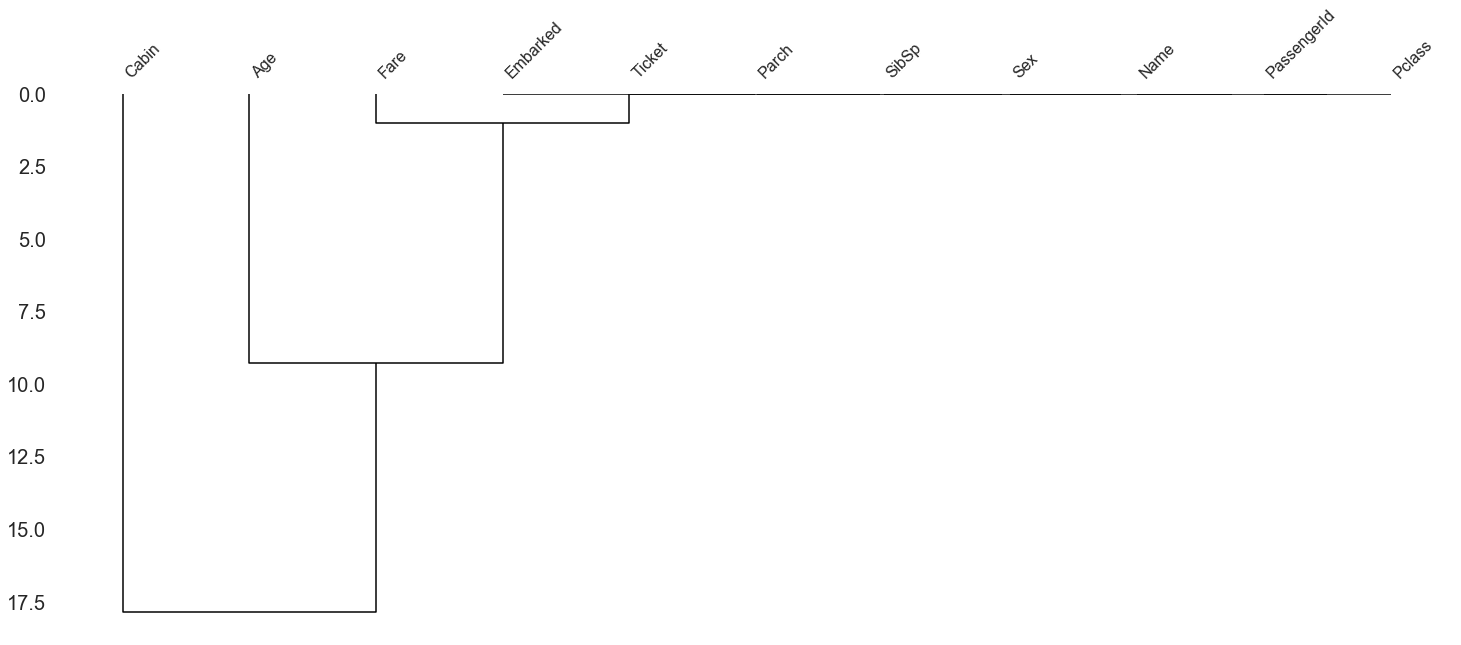

In [42]:
msno.dendrogram(df_train), msno.dendrogram(df_test) 

Target label 확인
- 예측할 레이블이 어떤 분포를 가지고 있는가?
-  binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라진다.

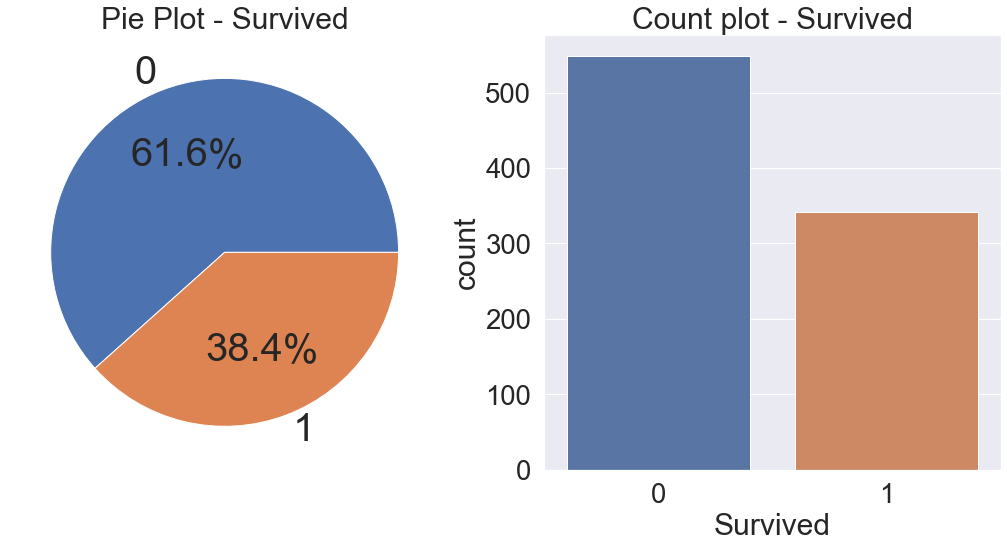

In [68]:
f, ax = plt.subplots(1,2,figsize= (18,8))

df_train['Survived'].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%',fontsize=40)

#생존률 한눈에 보기
ax[0].set_title('Pie Plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train,ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.savefig('Titanic-Survived')
plt.show()

38.4 %의 생존자 (100 중 38.4)

## 2. Feature 별 데이터 확인